# **Chapter 5. Role and Style Prompting**

This chapter will explore two effective techniques for **prompt design**: <font color="red">Role prompting</font> and <font color="red"> Style prompting</font>, both of which are particularly suitable for our Solar.

## **Table of Contents**
- Use `Ctrl + F` (Windows) or `Cmd + F` (Mac) to locate specific sections by title.

- **5.1 Assigning Roles to the Model**    

    - 5.1.1 Role prompting  
    
        - (1) Speaker-Specific Prompting  

        - (2) Audience-Specific Prompting  
  
  
    - 5.1.2 Style Prompting  

    - 5.1.3 Examples  
  
  
- **5.2 Maintaining Consistency in Response**   

    - 5.2.1 Define Clear Guidelines for Expected Response Formats  

        - (1) Examples   

            
  
  
    - 5.2.2 Use Consistent Terminology throughout Prompts  

    - 5.2.3 Practice  



In [1]:
from openai import OpenAI

# Retrieve the OPENAI_API_KEY variable from the IPython store
%store -r OPENAI_API_KEY

try:
    if OPENAI_API_KEY:
        print("Success!")
except NameError as ne:
    print(f"Since, {ne}")
    print("Please, insert your API key.")
    OPENAI_API_KEY = input("OPENAI_API_KEY =")

# Set your API key: 
# OPENAI_API_KEY = " " ←- Insert your API key here. 

client = OpenAI(
    api_key= OPENAI_API_KEY,
    base_url="https://api.openai.com/v1"
)

config_model = {
    "model": "gpt-4o-mini",
    "max_tokens": 2000,
    "temperature": 0.7,
    "top_p": 0.9,
}

def get_completion(messages, system_prompt="", config=config_model):
    try:
        if system_prompt:
            messages = [{"role": "system", "content": system_prompt}] + messages

        message = client.chat.completions.create(messages=messages, **config)
        return message.choices[0].message.content
    
    except Exception as e:
        print(f"Error during API call: {e}")
        return None

Success!


**Set up**

---

<a id="sec1"></a>
## **5.1 Assigning Roles to the Model**

### **5.1.1 Role Prompting**

Also referred to as **persona prompting**, this technique assigns a specific role to the large language model within the prompt. This approach can lead to more desirable outputs for open-ended tasks and, in some instances, enhance accuracy on benchmarks. 

We will overview two types of role prompting:

(1) `Speaker-Specific Prompt`: A prompt that assigns the role to the LLM.  

(2) `Audience-Specific Prompt:` A prompt that specifies the audience of the conversation (e.g., whom you are talking to).  

#### **(1) Speaker-Specific Prompt**

In [7]:

message = [
    {
        "role": "user",
        "content": """You are an expert lawyer.
Please interpret the case regarding the Good Samaritan law from the following. 
case: 
The California Supreme Court recently made an interesting ruling related to the "Good Samaritan law." This ruling concerns the legal dispute between Alexandra Van Horn and Lisa Toti. Here’s what happened: In 2004, Alexandra Van Horn and Lisa Toti were heading to a banquet with colleagues from the same factory. However, the car that Van Horn was in got into an accident, and Lisa Toti, who was in another car, pulled Van Horn out of her vehicle, which was stuck at the accident scene. Unfortunately, during this rescue, Van Horn sustained injuries that left her unable to use her lower body. Subsequently, Van Horn filed a lawsuit against Toti, claiming that she was paralyzed due to Toti's actions while trying to rescue her. The California Supreme Court ruled in a 4-3 decision, acknowledging Toti's responsibility."""
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

The case you described raises important legal issues surrounding the Good Samaritan law and the responsibilities of individuals who attempt to assist others in emergency situations. Here's an interpretation of the case based on the details provided:

### Key Legal Concepts

1. **Good Samaritan Law**: Generally, Good Samaritan laws are designed to protect individuals from legal liability when they voluntarily provide assistance to those who are injured or in peril, as long as their actions are reasonable and intended to help. These laws encourage bystanders to assist others in emergencies without fear of being sued for unintentional harm.

2. **Negligence**: In this context, the concept of negligence becomes crucial. For Van Horn to successfully claim damages against Toti, she would need to establish that Toti's actions during the rescue were negligent—that is, that they fell below the standard of care expected in such a situation and directly caused her injuries.

### Case Analysis

- 

In [4]:
# Without any specific role
message = [
    {
        "role": "user",
        "content": """Please interpret the case regarding the Good Samaritan law from the following. 
case: 
The California Supreme Court recently made an interesting ruling related to the "Good Samaritan law." This ruling concerns the legal dispute between Alexandra Van Horn and Lisa Toti. Here’s what happened: In 2004, Alexandra Van Horn and Lisa Toti were heading to a banquet with colleagues from the same factory. However, the car that Van Horn was in got into an accident, and Lisa Toti, who was in another car, pulled Van Horn out of her vehicle, which was stuck at the accident scene. Unfortunately, during this rescue, Van Horn sustained injuries that left her unable to use her lower body. Subsequently, Van Horn filed a lawsuit against Toti, claiming that she was paralyzed due to Toti's actions while trying to rescue her. The California Supreme Court ruled in a 4-3 decision, acknowledging Toti's responsibility."""
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

The case you provided involves an important interpretation of the Good Samaritan law in California, which generally protects individuals from liability when they voluntarily assist someone in peril, provided their actions are reasonable and intended to help.

In this scenario, Alexandra Van Horn was involved in a car accident and was rescued by Lisa Toti, who was in a separate vehicle. Unfortunately, during the rescue, Van Horn suffered further injuries that resulted in paralysis. Van Horn subsequently sued Toti, arguing that Toti's actions during the rescue were negligent and led to her injuries.

The California Supreme Court's ruling in favor of Van Horn, with a 4-3 decision, indicates that the court found Toti legally responsible for the injuries sustained by Van Horn during the rescue attempt. This ruling suggests that the court determined Toti's actions did not meet the standard of care expected under the Good Samaritan law, possibly implying that Toti's rescue efforts were reckle

#### **(2) Audience-Specific Prompt**

Please compare how a speaker-specific prompt and its results differ. 

In [5]:
message = [
    {
        "role": "user",
        "content": """You are currently talking with an elementary school student.
Please interpret the case regarding the Good Samaritan law from the following.
case: 
The California Supreme Court recently made an interesting ruling related to the "Good Samaritan law." This ruling concerns the legal dispute between Alexandra Van Horn and Lisa Toti. Here’s what happened: In 2004, Alexandra Van Horn and Lisa Toti were heading to a banquet with colleagues from the same factory. However, the car that Van Horn was in got into an accident, and Lisa Toti, who was in another car, pulled Van Horn out of her vehicle, which was stuck at the accident scene. Unfortunately, during this rescue, Van Horn sustained injuries that left her unable to use her lower body. Subsequently, Van Horn filed a lawsuit against Toti, claiming that she was paralyzed due to Toti's actions while trying to rescue her. The California Supreme Court ruled in a 4-3 decision, acknowledging Toti's responsibility."""
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

Okay! So, let's break this down in a way that's easy to understand.

Imagine you and your friend are at a picnic, and suddenly your friend gets hurt and can't move. You want to help them, so you try to pull them to safety. But while you're helping, you accidentally hurt them even more.

Now, in California, there is a special rule called the "Good Samaritan law." This rule is meant to protect people who try to help others in emergencies. It says that if someone is trying to help someone else and they accidentally cause more harm, they usually won't get in trouble for it.

In this case, there were two people named Alexandra and Lisa. They were both going to a party when Alexandra's car got into an accident. Lisa saw the accident and wanted to help Alexandra, so she pulled her out of the car. But when Lisa did that, Alexandra got hurt really badly and couldn't move her legs anymore.

Alexandra was upset and said that Lisa's actions caused her to be hurt. So, she decided to take Lisa to co

### **5.1.2 Style Prompting**

This technique entails defining the **desired style, tone, or genre** within the prompt to influence the output of a large language model. A comparable outcome can often be achieved through role prompting. 

**Compare the Structural Prompts**

These two prompts show noticeable distinctions.

In [7]:
message = [
    {
        "role": "user",
        "content": "Write a ten-word sentence about BTS, the Korean singers, in a humorous tone. 한국어로 작성해줘"
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

BTS의 팬들은 하루 종일 춤추고 노래하는 로봇 같아요! 




In [8]:
message = [
    {
        "role": "user",
        "content": "Write a ten-word sentence about BTS, the Korean singers. 한국어로 작성해줘"
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

BTS는 전 세계 팬들에게 사랑받는 한국의 인기 아이돌 그룹입니다. 




- **Stylistic Constraints**

For style prompting, we can also use `stylistic constraints`, which exist in all languages. This often consists of an adjective placed before a document type, such as in the examples:  

- "write a formal email to my boss."   

- "write a funny pickup line."

Here are some stylistic constraint examples:  

> writing style, tone, mood, characterization, pacing, plot and genre.  
  
- writing style: functional, flowery, candid, prosaic, ornate, poetic  

- tone: dramatic, humorous, sad, optimistic, formal, informal, assertive, aggressive  

- mood: angry, fearful, happy, sad  

- pacing : fast and slow paces  

### **5.1.3 Examples**

**Example #1: Content Creation**  

Compare the prompts: <ins>flowery(화려한)</ins> vs <ins>functional(기능적인)</ins>

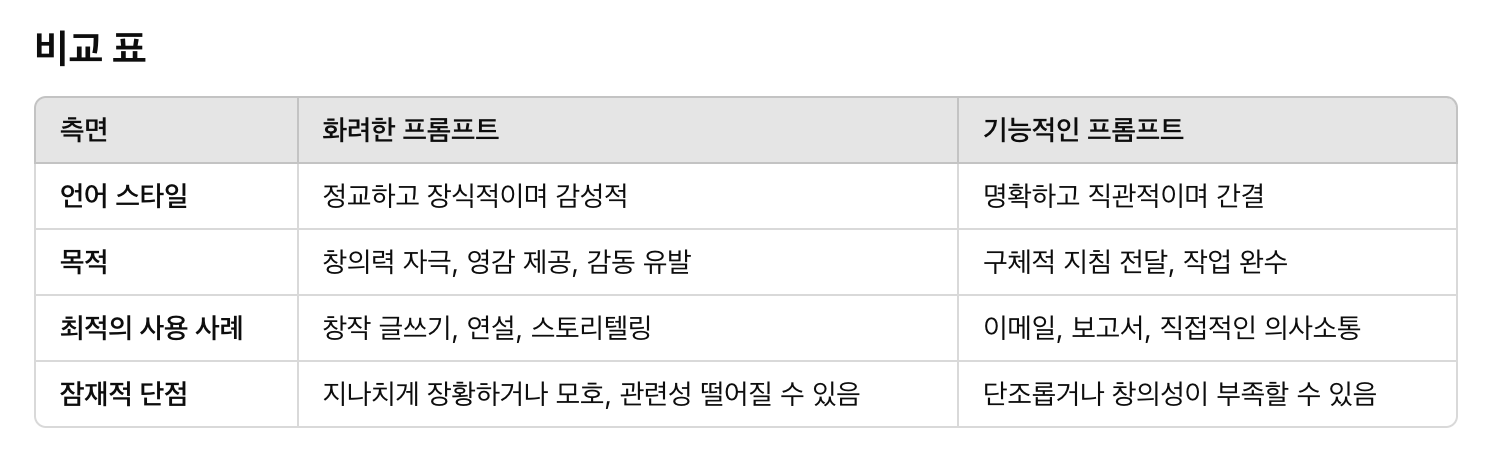

In [9]:
message = [
    {
        "role": "user",
        "content": "Write a flowery passage about sunrise."
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

As the first light of dawn unfurls across the horizon, the world awakens from its slumber, bathed in a delicate wash of pastel hues. The sun, a molten orb of gold, begins its slow ascent, casting a warm embrace over the earth. Gentle whispers of lavender and blush paint the sky, merging with the deep indigo of night, as if the heavens themselves are blushing at the beauty of the moment.

Birds, those jubilant heralds of the morn, break into song, their melodies weaving through the crisp air like silken threads of joy. The dew-kissed grass glistens like a field of diamonds, each droplet reflecting the burgeoning light, while flowers, timid yet eager, unfurl their petals to greet the day, basking in the tender glow of the sun’s caress.

In this sacred hour, shadows retreat, and the world is infused with a sense of hope and renewal. The gentle breeze carries with it the promise of possibilities yet to unfold, as nature stretches and yawns, shaking off the remnants of night. Each heartbeat

In [ ]:
message = [
    {
        "role": "user",
        "content": "Write a functional passage about sunrise."
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

As the world begins to stir from its slumber, a subtle change takes place in the sky. The darkness that once enveloped the landscape begins to recede, giving way to the soft, pastel hues of dawn. The first rays of the sun peek over the horizon, casting a warm, golden glow that slowly creeps across the land. The air is crisp and fresh, filled with the promise of a new day. The trees and plants seem to come alive, their leaves and branches reaching up towards the light, as if in silent gratitude for the sun's return. The sunrise is a beautiful reminder of the constant cycle of life, a symbol of hope and renewal. 




**Example #2: Business Email**

In [10]:
message = [
    {
        "role": "user",
        "content": "write a formal and well-structured buisness email to my employees. As the team leader of the marketing team, I want to send a thank-you email to my team members after the project's completion. In this email, I want to emphasize the team's efforts and achievements, and include a brief overview of the next steps."
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

Subject: Thank You for Your Outstanding Efforts on [Project Name]

Dear Team,

I hope this message finds you well.

As we conclude our recent project, I want to take a moment to express my heartfelt gratitude to each one of you for your exceptional efforts and dedication. Your hard work, creativity, and collaboration have played a pivotal role in achieving our objectives, and I am truly proud to be part of such a talented team.

Throughout the project, I witnessed remarkable teamwork, innovative ideas, and unwavering commitment. Each of you contributed unique skills and perspectives that enriched our approach and ultimately led to our success. The positive feedback we have received from stakeholders is a testament to your hard work and professionalism.

Looking ahead, we will be implementing the next steps to ensure that the momentum we’ve built continues. In our upcoming team meeting on [date], we will discuss how we can leverage our successes and address any challenges that may arise

**References** 

Zheng, M., Pei, J., Logeswaran, L., Lee, M., & Jurgens, D. (2024, November). *When” A Helpful Assistant” Is Not Really Helpful: Personas in System Prompts Do Not Improve Performances of Large Language Models.* In Findings of the Association for Computational Linguistics: EMNLP 2024 (pp. 15126-15154).

Lu, A., Zhang, H., Zhang, Y., Wang, X., & Yang, D. (2023). *Bounding the capabilities of large language models in open text generation with prompt constraints.* arXiv preprint arXiv:2302.09185.

---

<a id="sec2"></a>
## **5.2 Maintaining Consistency in Response**

**Constraints**

- Define clear guidelines for expected **response formats**.  

- Use **consistent terminology** throughout prompts to avoid confusion.  

Constraints are particularly effective in *zero-shot prompt engineering* techniques.

### **5.2.1 Define Clear Guidelines for Expected Response Formats**

- Specify the structure and components of the expected output.  

- Examples of response formats:  

    - **List Format**: “Provide a list of five benefits of regular exercise.”  

    - **Paragraph Format**: “Explain the importance of renewable energy in a single paragraph.”  

    - **Dialogue Format**: “Write a conversation between two characters (Name A and Name B) discussing their weekend plans. Include three multi-turn exchanges.”  

#### **(1) Examples**

**Example #1: List Format**

In [8]:
message = [
    {
        "role": "user",
        "content": "Provide a list of five benefits of regular exercise."
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

Regular exercise offers numerous benefits for both physical and mental health. Here are five key benefits:

1. **Improved Physical Health**: Regular exercise strengthens the heart, improves circulation, and enhances lung capacity. It also helps maintain a healthy weight and reduces the risk of chronic diseases such as diabetes, heart disease, and certain cancers.

2. **Enhanced Mental Well-being**: Exercise is known to boost mood and reduce symptoms of anxiety and depression. Physical activity releases endorphins, which can create feelings of happiness and euphoria.

3. **Increased Energy Levels**: Engaging in regular physical activity can improve overall stamina and reduce feelings of fatigue. This can lead to increased productivity and a more active lifestyle.

4. **Better Sleep Quality**: Regular exercise can help regulate sleep patterns and improve the quality of sleep, making it easier to fall asleep and stay asleep throughout the night.

5. **Stronger Muscles and Bones**: Weight-

**Example #2: Paragraph Format**

In [9]:
message = [
    {
        "role": "user",
        "content": "Explain the importance of renewable energy in a single paragraph."
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

Renewable energy is crucial for mitigating climate change, reducing dependence on fossil fuels, and promoting sustainable development. By harnessing natural resources such as sunlight, wind, and water, renewable energy sources produce electricity with minimal greenhouse gas emissions, thereby helping to lower global temperatures and combat environmental degradation. Additionally, the transition to renewable energy can stimulate economic growth through job creation in new industries, enhance energy security by diversifying energy supply, and improve public health by reducing air and water pollution. Overall, embracing renewable energy is vital for creating a sustainable future for both the planet and its inhabitants. 




**Example #3: Dialogue Format**

In [10]:
message = [
    {
        "role": "user",
        "content": "Write a conversation between two characters (Name A and Name B) discussing their weekend plans. Include three multi-turn exchanges."
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

**Character A:** Hey, do you have any plans for the weekend?

**Character B:** Not really, I was thinking about just relaxing at home. What about you?

**Character A:** I was actually thinking of going hiking. There's that new trail that just opened up at the state park. I’ve heard the views are amazing!

**Character B:** That sounds awesome! I love hiking, but I didn’t know about that trail. How long is it?

---

**Character A:** I think it’s about five miles round trip. It’s supposed to take a couple of hours, depending on how many breaks we take. Want to join me?

**Character B:** I’d love to! I could use some fresh air and exercise. What time are you thinking of heading out?

**Character A:** How about we leave around 8 AM? That way we can beat the heat and enjoy the morning light.

---

**Character B:** Perfect! I’ll pack some snacks and water. Do you want to grab breakfast before we go?

**Character A:** That’s a great idea! There’s that little café downtown that has the best bre

### **5.2.2 Use Consistent Terminology throughout Prompts** 

- Select specific terms and phrases to **use consistently** in all related prompts. This minimizes confusion and helps the model understand the context better.  

    For example, if you choose "user" to refer to the person interacting with the model, use "user" instead of switching to "client" or "participant.”

### **5.2.3 Practice**

**Exercise #1 : Response Format**

Read the following text and summarize it. Limit the length. Group similar concepts together and classify them by type.

- Text :
> **Face Amount**
> 
> The dollar amount to be paid to the beneficiary when the insured dies. It does not include other amounts that may be paid from insurance purchased with dividends or any policy riders.
> 
> **Financial Guarantee Insurance**
> 
> A surety bond, insurance policy or, when issued by an insurer, an indemnity contract and any guaranty similar to the foregoing types, under which loss is payable upon proof of occurrence of financial loss to an insured claimant, obligee, or indemnitee.
> 
> **Fire Insurance**
> 
> Coverage for loss of or damage to a building and/or contents due to fire.
> 
> **Good Driver Discount**
> 
> To be eligible for the Good Drivers Discount all operators of the insured vehicles must have been licensed for three or more year, have no more than a one (1) point charge on their driving record and has not been determined "at fault" in an accident resulting in bodily injury or death to any person.
> 
> **Grace Period**
> 
> A specified period immediately following the premium due date during which a payment can be made to continue a policy in force without interruption. This applies only to Life and Health policies. Check your policy to be sure that a grace period is offered and how many days, if any, are allowed.
> 
> **Guaranteed Insurability**
> 
> An option that permits the policy holder to buy additional stated amounts of life insurance at stated times in the future without evidence of insurability.
> 
> **Health Insurance**
> 
> A policy that will pay specifies sums for medical expenses or treatments. Health policies can offer many options and vary in their approaches to coverage.
> 
> **Homeowner Insurance**
> 
> An elective combination of coverages for the risks of owning a home. Can include losses due to fire, burglary, vandalism, earthquake, and other perils.
> 
> **Incontestable Clause**
> 
> A policy provision in which the company agrees not to contest the validity of the contract after it has been in force for a certain period of time, usually two years.

In [ ]:
message = [
    {
        "role": "user",
        "content": " " # ←- Insert your prompt here.
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

**$\rightarrow$ Expected Output:**

> 1. **Insurance Types**:
> - Financial Guarantee Insurance: A contract that covers financial loss.
> - Fire Insurance: Covers loss or damage due to fire.
> - Health Insurance: Pays for medical expenses or treatments.
> - Homeowner Insurance: Covers risks of owning a home, like fire, burglary, etc.
> 2. **Policy Features**:
> - Face Amount: The dollar amount paid to the beneficiary upon the insured's death.
> - Good Driver Discount: Discount for drivers with clean records.
> - Grace Period: Period after premium due date to continue a policy without interruption.
> - Guaranteed Insurability: Option to buy additional insurance without evidence of insurability.
> - Incontestable Clause: Provision preventing the company from contesting the contract's validity after a certain period.
  
  

**Exercise #2: Terminology Consistency**

Explain the differences between a 'meme' and a 'viral video' in the context of social media marketing. Use 'content' to refer to both.

In [ ]:
message = [
    {
        "role": "user",
        "content": " " # ←- Insert your prompt here.
    }
]

response = get_completion(messages=message)
print(response, "\n\n")

**$\rightarrow$ Expected Output:**

> A meme is a type of content that spreads humor or cultural ideas through images and text, while a viral video is a type of content that rapidly gains popularity and is shared widely across platforms. 